# Analysing Stackoverflow's Annual Developer Survey
## by José Manuel García
### Data Science Nanodegree

#### June 9th 2020
--------------------

## Table of Contents
- [Data Preparation](#prepare)
- [Question 1](#question1)
- [Question 2](#question2)
- [Question 3](#question3)

## Introduction and business understanding
Nowadays, areas such as Artificial Intelligence or Software Engineering are on trend, so it might be interesting to know the language that people who work in these sectors speak, isn’t it?

In this article, data from the last three years is to be analyzed in order to provide the reader with information about many programmers and their languages.

To do this, as said before, Stackoverflow’s Annual Developer Surveys are to be used, since this is one of the most important sources of information about the users in the world.

The three questions that will be addressed in this article are:

1 - What has been the evolution of the most used programming languages during the last years?

2 - What has been the evolution of the most wanted programming languages during the last years?

3 - Relationship between company size and most used programming languages during 2019?

To see a detailed explaination of the results, pleae go to [my published article](https://medium.com/@josem5garcialopez/what-is-the-evolution-of-programming-languages-in-the-last-3-years-f507aa99f787).

<a id='prepare'></a>
## Data Preparation
___________________

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
%matplotlib inline

import seaborn as sns
sns.set()

### Gather

In [2]:
# Reading all the datasets
df_2019 = pd.read_csv('data/survey_results_public_2019.csv', low_memory=False)
df_2019['year'] = '2019'
df_2018 = pd.read_csv('data/survey_results_public_2018.csv', low_memory=False)
df_2018['year'] = '2018'
df_2018 = df_2018.rename(columns={'CompanySize': 'OrgSize'})
df_2017 = pd.read_csv('data/survey_results_public_2017.csv', low_memory=False)
df_2017['year'] = '2017'
df_2017 = df_2017.rename(columns={'HaveWorkedLanguage': 'LanguageWorkedWith',
                                  'WantWorkLanguage': 'LanguageDesireNextYear',
                                  'CompanySize': 'OrgSize'})

### Assess

In [3]:
df_2019.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [4]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 86 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [5]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,year
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,2019
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,2019
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult,2019
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,2019
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy,2019


In [6]:
df_2018.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 130 entries, Respondent to year
dtypes: float64(41), int64(1), object(88)
memory usage: 98.0+ MB


In [8]:
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,OrgSize,DevType,...,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,year
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,2018
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,2018
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,2018
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,2018


In [9]:
df_2017.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [10]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 155 entries, Respondent to year
dtypes: float64(6), int64(1), object(148)
memory usage: 60.8+ MB


In [11]:
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,OrgSize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,year
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,2017
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,2017
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,2017
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,2017
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


### Clean

In [12]:
# List with languages used to work
work_language = pd.DataFrame()
work_language = work_language.append(df_2019[['year', 'LanguageWorkedWith', 'OrgSize']], ignore_index = True)
work_language = work_language.append(df_2018[['year', 'LanguageWorkedWith', 'OrgSize']], ignore_index = True)
work_language = work_language.append(df_2017[['year', 'LanguageWorkedWith', 'OrgSize']], ignore_index = True)

# List of the most desired language for the next year 
desired_language = pd.DataFrame()
desired_language = desired_language.append(df_2019[['year', 'LanguageDesireNextYear']], ignore_index = True)
desired_language = desired_language.append(df_2018[['year', 'LanguageDesireNextYear']], ignore_index = True)
desired_language = desired_language.append(df_2017[['year', 'LanguageDesireNextYear']], ignore_index = True)

In [13]:
# Drop NaNs in both DataFrames since there is a lot of information and this will cause a negligible effect
work_language.dropna(inplace=True)
desired_language.dropna(inplace=True)

In [14]:
def tune_dataframe(df, column):
    ''' Modify the current DataFrame to show percentages of programming languages,
        returns modified DataFrame
        INPUTS: DataFrame to be modified and column to work with
        OUTPUTS: Modified DataFrame
    '''
    df_final = pd.DataFrame()
    for year in np.unique(df.year):
        df_copy = df.query('year == "' + year + '"')
        column_series = df_copy[column].apply(lambda x: x.split(';'))
        
        data_list = []
        for row in column_series:
            for obj in row:
                data_list.append(obj.strip())

        grouped_list = dict(Counter(data_list))
        grouped_dict = [{'Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]

        df_year = pd.DataFrame(grouped_dict)
        
        df_year['Percent_year'] = df_year['Count']/df_year['Count'].sum()
        
        df_final = df_final.append(df_year, ignore_index=True)
        
    return df_final
    
work_language_percent = tune_dataframe(work_language, 'LanguageWorkedWith')
desired_language_percent = tune_dataframe(desired_language, 'LanguageDesireNextYear')

In [15]:
# Combine HTML and CSS for 2018 in order to keep the same format than in 2019
def same_format(df):
    '''Tune the labels for HTML and CSS in order to keep the same than in 2019 data
        INPUTS: DataFrame to be modified
        OUTPUTS: Modified DataFrame
    '''
    df_copy = df.copy()
    
    index_change1 = df_copy[df_copy.Language == 'HTML'].index
    count1 = df_copy.loc[index_change1, 'Count']
    percent1 = df_copy.loc[index_change1, 'Percent_year']
    df_copy.loc[index_change1, 'Language'] = 'HTML/CSS'
    index_change2 = df_copy[df_copy.Language == 'CSS'].index
    count2 = df_copy.loc[index_change2, 'Count']
    percent2 = df_copy.loc[index_change2, 'Percent_year']
    
    df_copy.loc[index_change1, 'Count'] = float(count1) + float(count2)
    df_copy.loc[index_change1, 'Percent_year'] = float(percent1) + float(percent2)
    df_copy.drop(index=index_change2, inplace=True)

    return df_copy

work_language_percent = same_format(work_language_percent)
desired_language_percent = same_format(desired_language_percent)

In [16]:
def language_orgsize(df, all_languages, cols=['LanguageWorkedWith', 'OrgSize']):
    ''' Provides a DataFrame with just information of OrgSize and the Languages Used,
        returns DataFrame
        INPUTS: DataFrame to be modified and all the languages in the set
        OUTPUTS: Modified DataFrame    
    '''
    
    df_copy = df.loc[:, cols].copy()
    
    for i in all_languages:
        df_copy.loc[:, i] = 0
    
    df_copy[cols[0]] = df_copy[cols[0]].apply(lambda x: x.split(';'))
    
    for i in df_copy.index:
        langs = df_copy.loc[i, 'LanguageWorkedWith']
        df_copy.loc[i, langs] = 1
    
    return df_copy
    
work_language_orgsize = language_orgsize(work_language.query('year == "2019"'),
                                         work_language_percent.Language.tolist())

In [17]:
def language_orgsize_percent(df):
    ''' Calculate percentages language usage per Organization Size ,
        returns DataFrame
        INPUTS: DataFrame to be modified
        OUTPUTS: Modified DataFrame    
    '''
    
    df_copy = df.copy()
    
    df_final = pd.DataFrame()
    list_columns = df_copy.iloc[:, 2:].columns
    list_index = np.unique(df_copy.OrgSize)
    values = []
    for org_type in list_index:
        df_org = df_copy.query('OrgSize == "' + org_type + '"')
        aux_vals = df_org.loc[:, list_columns].sum(axis=0) / df_org.loc[:, list_columns].sum(axis=0).sum()
        values.append(aux_vals.values.tolist())
        
    df_final = pd.DataFrame(values, index=list_index, columns=list_columns)        
    return df_final

work_language_orgsize_percent = language_orgsize_percent(work_language_orgsize)

### Analyze and Visualize

<a id='question1'></a>
#### Question 1: What has been the evolution of the most used programming languages during the last years?
--------------------------

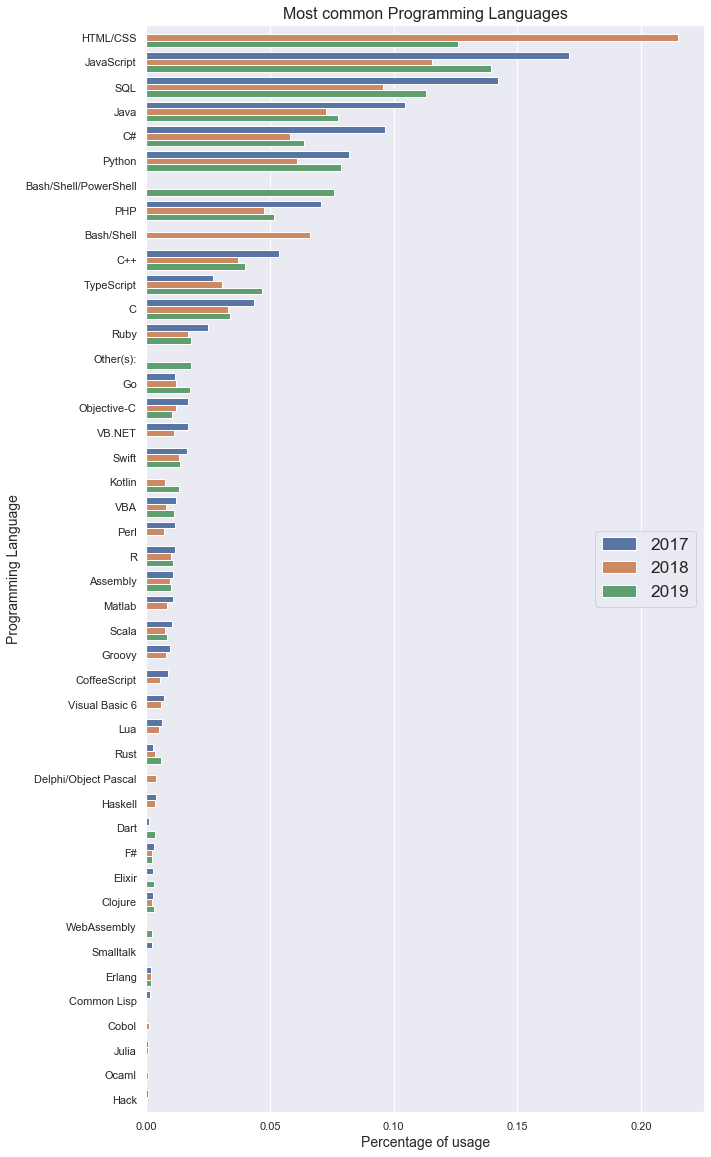

In [18]:
plt.figure(figsize=(10, 20))
sns.barplot(x = 'Percent_year', 
            y = 'Language',
            hue = 'Year',
            data = work_language_percent.sort_values(by='Percent_year', ascending=False))

plt.xlabel("Percentage of usage", fontsize = 14)
plt.ylabel("Programming Language", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages', size = 16)
plt.show()

According to Figure 1, the top-3 languages have been the same for the last three years: JavaScript, SQL and HTML/CSS. It must be highlighted how the 15 most used ones cope with most of the percentage, whilst the rest are almost negligible in comparison with the rest.

<a id='question2'></a>
#### Question 2: What has been the evolution of the most wanted programming languages during the last years?

--------------------------

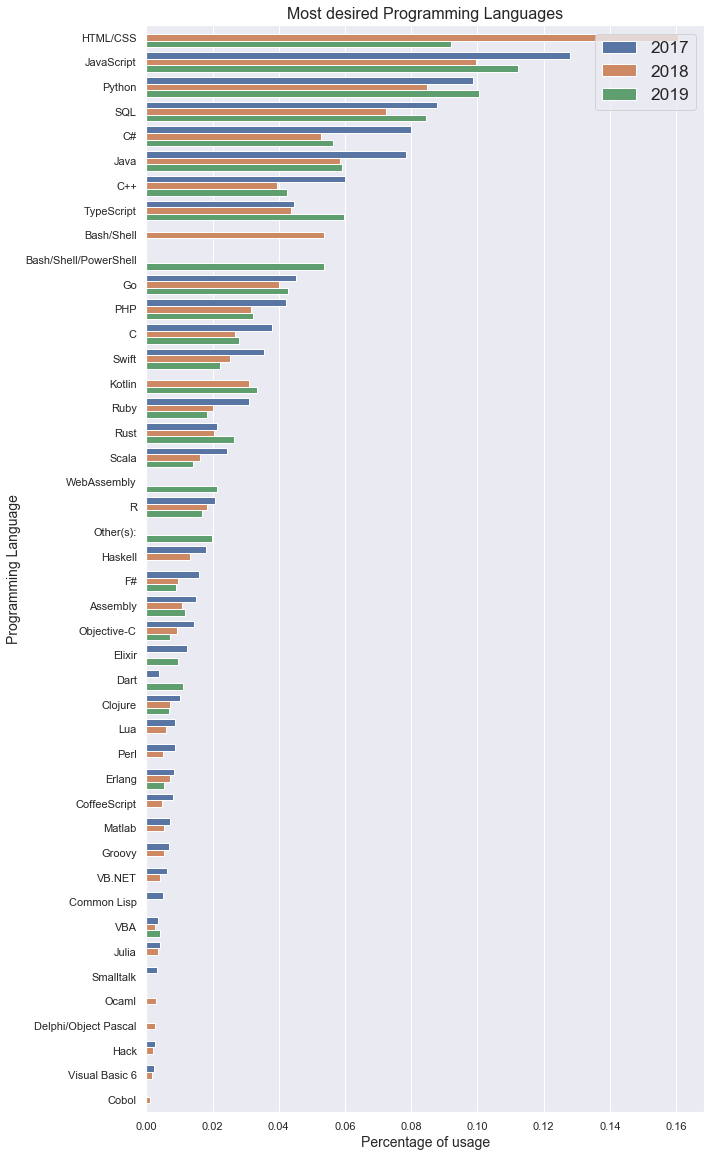

In [19]:
plt.figure(figsize=(10, 20))
sns.barplot(x = 'Percent_year', 
            y = 'Language',
            hue = 'Year',
            data = desired_language_percent.sort_values(by='Percent_year', ascending=False))

plt.xlabel("Percentage of usage", fontsize = 14)
plt.ylabel("Programming Language", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most desired Programming Languages', size = 16)
plt.show()

Once the most used programming languages at work have been outlined, it is interesting to know which ones are those that programmers want to learn the most. In this case, according to Figure 2, the top-3 are: JavaScript, Python and HTML/CSS. In this case, the top positions vary a bit in comparison with the previous results, and so does their distribution, being more uniform until a higher number of languages than before.

<a id='question3'></a>
#### Question 3: Relationship between company size and most used programming languages during 2019?
--------------------------

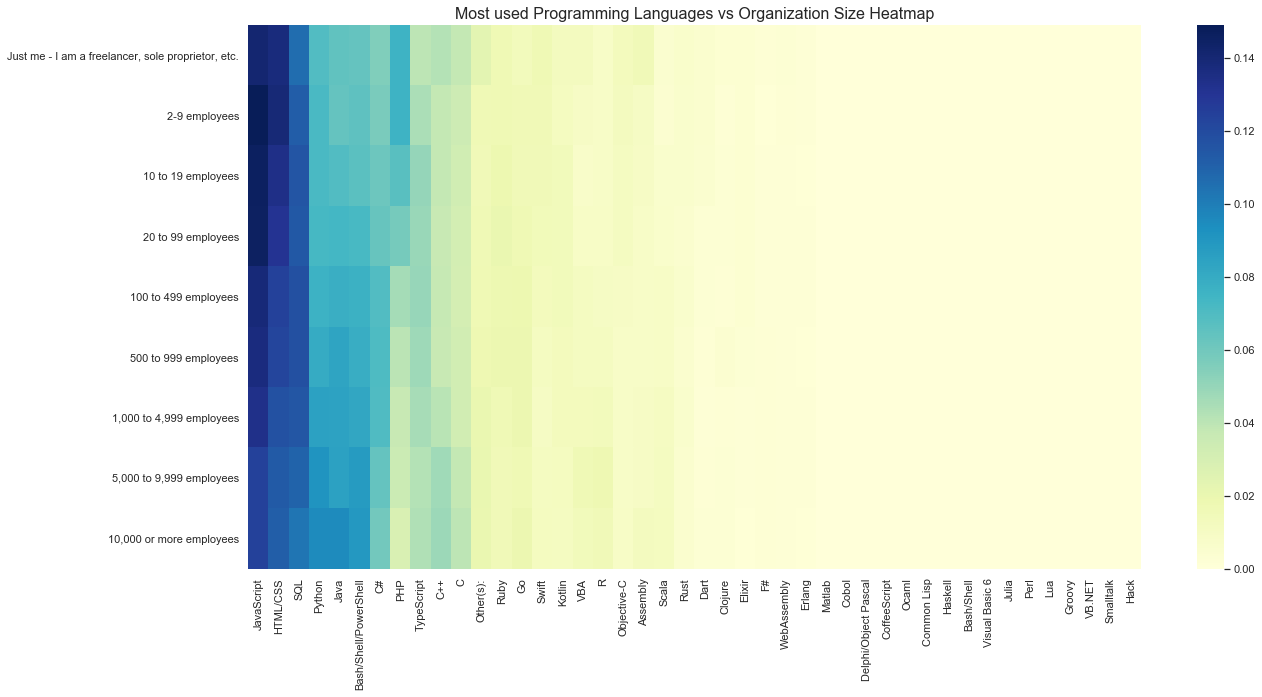

In [20]:
order_index = ['Just me - I am a freelancer, sole proprietor, etc.',
               '2-9 employees',
               '10 to 19 employees',
               '20 to 99 employees',
               '100 to 499 employees',
               '500 to 999 employees',
               '1,000 to 4,999 employees',
               '5,000 to 9,999 employees',
               '10,000 or more employees']

matrix = work_language_orgsize_percent.loc[order_index, :]
matrix = matrix.reindex(matrix.mean().sort_values(ascending=False).index, axis=1)

plt.figure(figsize=(20, 10))
sns.heatmap(matrix, cmap="YlGnBu")
plt.title('Most used Programming Languages vs Organization Size Heatmap', size = 16)
plt.ylabel('')
plt.show()

Finally, it was considered interesting to know if a relationship between organization size and used programming language exists. At sight of Figure 3, it can be concluded that there is a more or less uniform usage of programming languages for all the company sizes, without a clear distinction between smaller and larger companies.

## Conclusion

As it can be seen in the previous lines, interesting insights have been obtained form Stackoverflow’s 2017, 2018 and 2019 Annual Developer Surveys, to highlight:

- JavaScript, SQL and HTML/CSS have been found as the most commonly used programming languages for working.

- JavaScript, Python and HTML/CSS have been found as the most desired-to-learn programming languages.

- There is not a relationship between organization size and the programming languages they use.